In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
df=pd.read_csv("../Data.csv")

In [3]:
df.index = pd.to_datetime(df.index, errors='coerce')


In [4]:
# Normalisation des prix
scaler = MinMaxScaler()
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

In [5]:
# Création des séquences pour le modèle RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [12]:
seq_length = 10  # Nombre de jours utilisés pour prédire le jour suivant
train_size=0.8

In [13]:
# Split data into train and test sets
train_data = df['Scaled_Close'].values[:int(len(df) * train_size)]
test_data = df['Scaled_Close'].values[int(len(df) * train_size):]

In [14]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse')

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0547  
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013    
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9000e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6112e-04 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6125e-04 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7197e-04 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6353e-04 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5501e-04 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5351e-04 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8912e-04 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3994e-04 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9295e-04 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7143e-04 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9702e-04 
Epoch 15/20
32/32 ━━

In [21]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [23]:
df['Predicted_Close'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [24]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [25]:
df.loc[train_index, 'Predicted_Close'] = train_predictions
df.loc[test_index, 'Predicted_Close'] = test_predictions

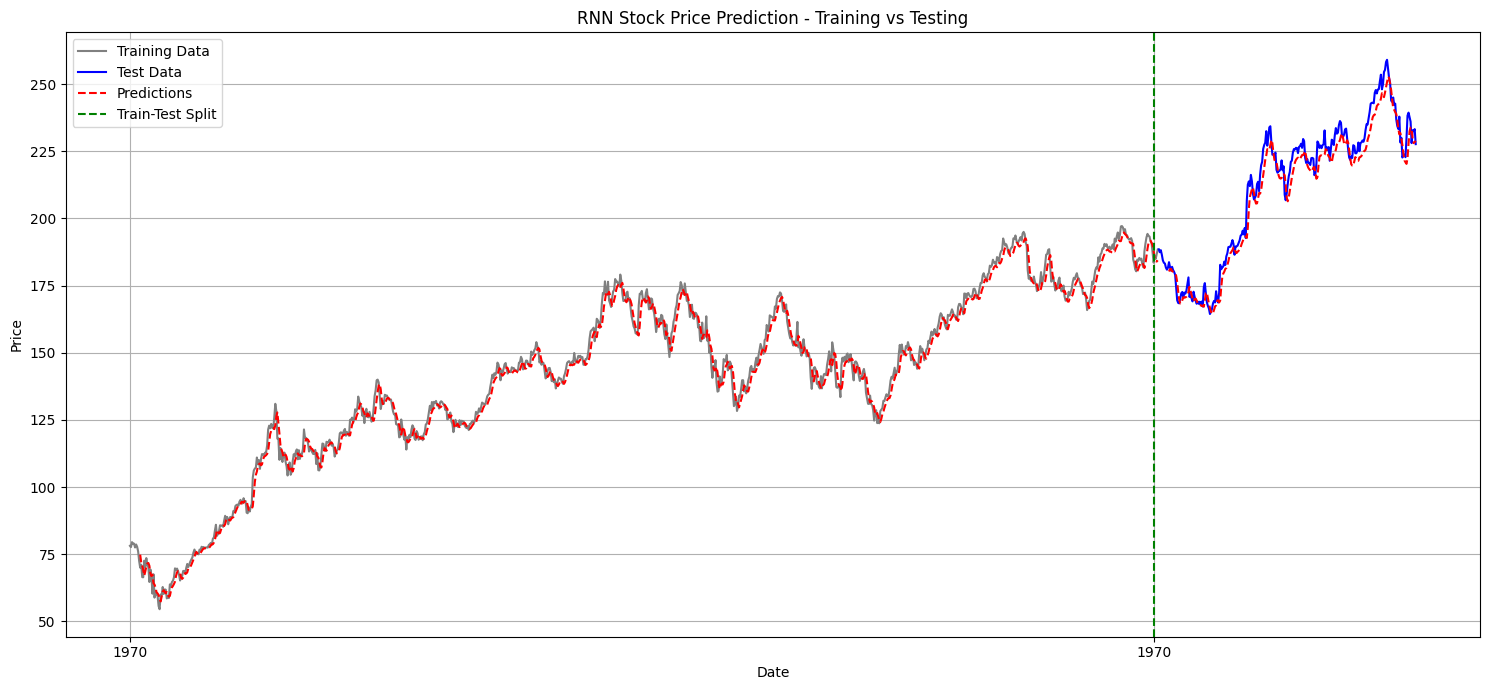

In [26]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("RNN Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()